In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing dataset
df = pd.read_excel("iris (3).xls")

In [3]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


###  Check the basic details of the dataset

In [4]:
df.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [5]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Shape of the data
df.shape

(150, 5)

In [7]:
# Info of the data
df.info

<bound method DataFrame.info of       SL   SW   PL   PW  Classification
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    NaN  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  NaN  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

In [8]:
# Checking for null values
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

###  Fill in all the missing values present in all the columns in the dataset

In [9]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [10]:
num_cols =df[['SL', 'SW','PL']]

In [11]:
num_cols.isna().sum()

SL    7
SW    6
PL    6
dtype: int64

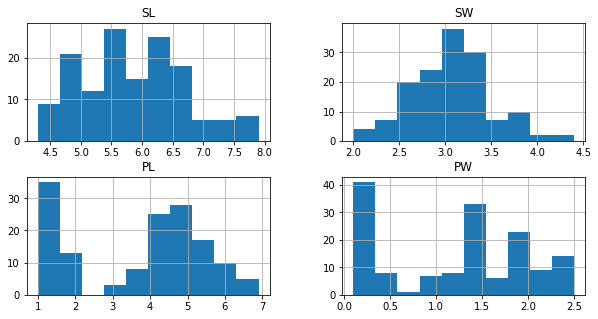

In [12]:
freqgraph = df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(10,5))
plt.show()

In [13]:
df['SL'] = df['SL'].fillna(df['SL'].mean())

In [14]:
df['SL'].isna().sum()

0

In [15]:
df['SW'] = df['SW'].fillna(df['SW'].mean())

In [16]:
df['SW'].isna().sum()

0

In [17]:
df['PL'] = df['PL'].fillna(df['PL'].mean())

In [18]:
df['PL'].isna().sum()

0

In [19]:
df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [20]:
df.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

### Check and handle outliers in at least 3 columns in the dataset

Text(0.5, 1.0, 'Boxplot of SL column')

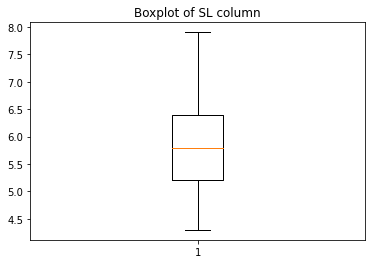

In [21]:
plt.boxplot(df['SL'])
plt.title('Boxplot of SL column')

Text(0.5, 1.0, 'Boxplot of PL column')

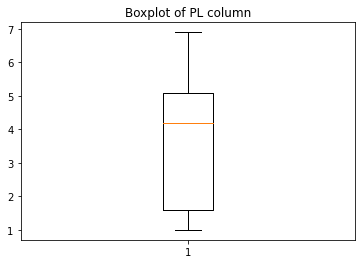

In [22]:
plt.boxplot(df['PL'])
plt.title('Boxplot of PL column')

Text(0.5, 1.0, 'Boxplot of PW column')

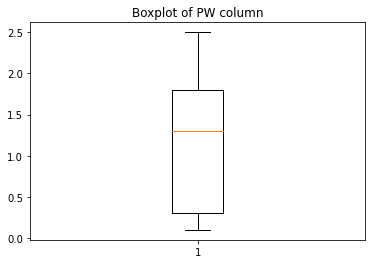

In [23]:
plt.boxplot(df['PW'])
plt.title('Boxplot of PW column')

Text(0.5, 1.0, 'Boxplot of SW column')

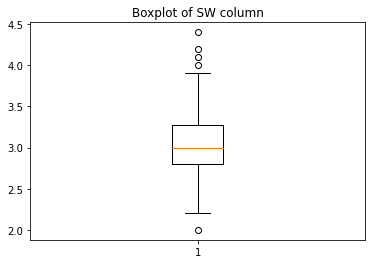

In [24]:
plt.boxplot(df['SW'])
plt.title('Boxplot of SW column')

In [25]:
Q1 = np.percentile(df['SW'], 25, interpolation='midpoint')
Q2= np.percentile(df['SW'], 50,interpolation='midpoint')
Q3 = np.percentile(df['SW'], 75,interpolation='midpoint')

In [26]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [27]:
df['SW'].median()

3.0

In [28]:
IQR = Q3 - Q1
print(IQR)

0.4500000000000002


In [29]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [30]:
print(low_lim)
print(up_lim)

2.1249999999999996
3.9250000000000003


In [31]:
outlier=[]
for x in df['SW']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [32]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [33]:
ind = df['SW']>up_lim

In [34]:
df1 = df.loc[ind].index

In [35]:
df1

Int64Index([14, 15, 32, 33], dtype='int64')

# Corelation Metrix


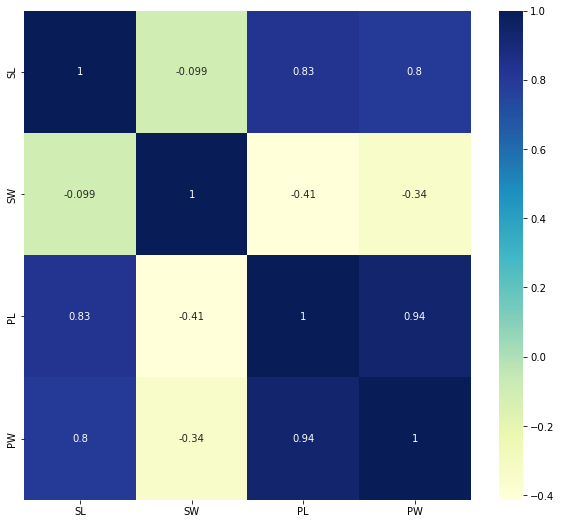

In [36]:
corrmatrix = df.corr()
plt.subplots(figsize=(10,9))
sns.heatmap(corrmatrix, annot=True, cmap='YlGnBu');

### Label Encodeing

In [37]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

In [38]:
df['Classification']=label_enc.fit_transform(df['Classification'])

In [39]:
df.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


# Creating a Logistic Regression model


In [40]:
# split X and Y
y =df['Classification']
X =df.drop('Classification', axis = 1)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
# Creating a Logistic Regression model
logistic_model = LogisticRegression()
logistic_model = logistic_model.fit(X_train, y_train)
y_pred_logi = logistic_model.predict(X_test)

In [45]:
y_pred_logi

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
#checking confusion matrix
confusion_matrix(y_test, y_pred_logi)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [48]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: Classification, dtype: int32

In [49]:
from sklearn.metrics import precision_score, recall_score

In [50]:
recall_score(y_test, y_pred_logi, average = 'micro')*100

100.0

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
# check accuracy
accuracy_score(y_test, y_pred_logi)

1.0

### kNN Model

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
metric_k = []
neighbors = range(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train, y_train)
    y_pred_kNN = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred_kNN)
    metric_k.append(acc)

In [55]:
metric_k 

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

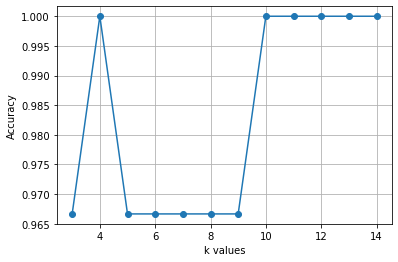

In [56]:
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.grid()

In [78]:
classifier = KNeighborsClassifier(n_neighbors=4)
classifier = classifier.fit(X_train, y_train)
y_pred_kNN = classifier.predict(X_test)

In [79]:
confusion_matrix(y_test, y_pred_kNN)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [80]:
recall_score(y_test, y_pred_kNN, average = 'micro')*100

100.0

In [81]:
(accuracy_score(y_test, y_pred_kNN)*100)

100.0

### SVM

In [61]:
from sklearn.svm import SVC

In [62]:
# kernel = linear
svm_clf = SVC(kernel = 'linear')
svm_clf = svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [64]:
confusion_matrix(y_test, y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [65]:
accuracy_score(y_test, y_pred_svm)

1.0

In [66]:
### kernel = rbf
svm_clf2 = SVC(kernel = 'rbf')
svm_clf2 = svm_clf2.fit(X_train, y_train)
y_pred_svm2 = svm_clf2.predict(X_test)

In [67]:
confusion_matrix(y_test, y_pred_svm2)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [68]:
accuracy_score(y_test, y_pred_svm2)

1.0

### Dicision Tree 

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

In [71]:
confusion_matrix(y_test, y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [72]:
accuracy_score(y_test, y_pred_dt)

1.0

### RandomForestClassifier

In [73]:
from sklearn.ensemble import RandomForestClassifier 

In [74]:
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [75]:
confusion_matrix(y_test, y_pred_rf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [76]:
accuracy_score(y_test, y_pred_rf)

1.0

In [77]:
###  Here we can use any model for classification beacuse the accuracy for almodel is same